# Пример решения соревнования

Сначала импортируем все нужные библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline

Зашружаем обучающую выборку.

In [2]:
df = pd.read_csv('./train.csv')

Посмотрим на нее.

In [3]:
df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Разобьем ее на $\textbf{X}$ и $\textbf{y}$.

In [4]:
y = df.label
x = df.drop('label', axis=1)

Разобьем ее для **обучения** и **валидации**.

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=42)

Посмотрим, что представляет из себя обучающая выборка.

In [6]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3836,0,0,0,0,0,0,0,0,0,0,...,52,26,0,0,0,0,0,0,0,0
6408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4840,0,0,0,0,0,0,0,4,0,0,...,118,120,86,98,0,0,2,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,58,119,53,0,0,0,0
6105,0,0,0,0,0,0,0,0,0,0,...,52,0,0,0,0,0,0,0,0,0


Посмотрим, как выглядит какая-нибудь картинка.

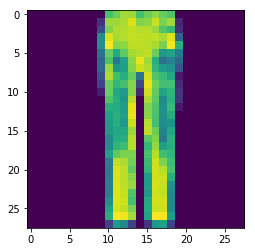

In [7]:
plt.imshow(x_train.iloc[4].values.reshape(28,28))
plt.show()

Обучим простейшую модель.

In [8]:
clf = LogisticRegression()

In [9]:
%%time
clf.fit(x_train, y_train)

CPU times: user 1min 55s, sys: 1.22 s, total: 1min 56s
Wall time: 2min 4s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
clf.score(x_val, y_val)

0.7545

Теперь загрузим **тестовую** выборку.

In [11]:
df = pd.read_csv('./test.csv')

In [12]:
df.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,1,1,0,0,...,2,0,21,138,151,71,0,0,0,0
1,0,0,0,0,0,0,0,0,20,77,...,50,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,2,0,0,0,...,77,69,47,10,0,2,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,134,84,0,0,0,0,0,0,0,0


Для нее нам нужно сделать предсказания.

In [13]:
y_pred = clf.predict(df)

Сохраним их в требуемом виде и скачаем в файл `submission.csv`. Осторожно, файлы перезаписываются!

In [14]:
submission = pd.DataFrame(y_pred, columns=['label'])

In [15]:
submission.to_csv('submission.csv', index_label='Id')